# <center> PROCESAMIENTO DIGITAL DE SEÑALES DE AUDIO</center>
## <center> Harmonic-Percussive Source Separation</center>      

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import librosa
import librosa.display

import IPython.display as ipd

**NOTA:** *Las siguientes dos celdas solo son necesarias para descargar el archivo de ejemplo. Ignórelas si va a trabajar con sus propios archivos de audio.*

In [4]:
!pip install wget

In [5]:
import wget

### Cómo correr el notebook
Se puede bajar y correr el notebook de forma local en una computadora.

O también se puede correr en Google Colab usando el siguiente enlace. 

<table align="center">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/mrocamora/audio-dsp/blob/main/notebooks/audioDSP-separation_example.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

### Descomposición en componentes armónicos y percusivos

Se calcula la STFT y se aplica al espectrograma un filtro de mediana en sentido vertical (componentes percusivos) y otro filtro de mediana en sentido horizontal (componentes harmónicos). A partir de los espetrogramas filtrados se derivan máscaras para generar espectrogramas de los componentes percursivos y de los componentes armónicos. Inviertiendo esos espectrogramas se pueden obtener señales en el tiempo. [1].

[1] Derry FitzGerald: Harmonic/Percussive Separation Using Median Filtering. Proceedings of the International Conference on Digital Audio Effects (DAFx), Graz, Austria, 2010, pp. 246-253. 

In [8]:
# download audio file
wget.download('https://github.com/mrocamora/audio-dsp/blob/main/audio/short_clip.wav?raw=true')

'short_clip.wav'

In [23]:
# read the audio file
filename = 'short_clip.wav'

y, sr = librosa.load(filename)

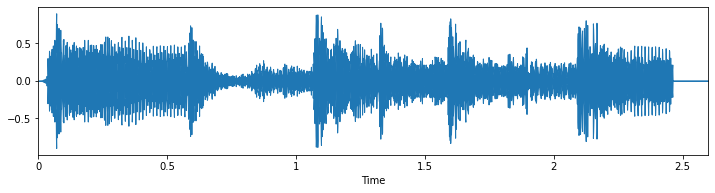

In [24]:
# plot audio signal
plt.figure(figsize=(12,6))
ax1 = plt.subplot(2, 1, 1)
librosa.display.waveplot(y, sr=sr)

In [25]:
ipd.Audio(y, rate=sr)

In [26]:
D = librosa.stft(y)

D_harmonic, D_percussive = librosa.decompose.hpss(D)

y_harmonic = librosa.istft(D_harmonic)
y_percussive = librosa.istft(D_percussive)

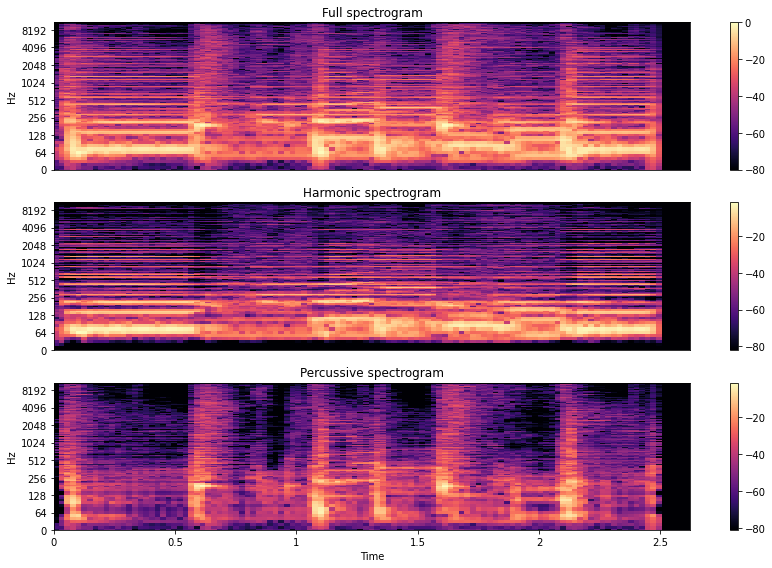

In [27]:
# Pre-compute a global reference power from the input spectrum
rp = np.max(np.abs(D))

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D), ref=rp), y_axis='log')
plt.colorbar()
plt.title('Full spectrogram')

plt.subplot(3, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_harmonic), ref=rp), y_axis='log')
plt.colorbar()
plt.title('Harmonic spectrogram')

plt.subplot(3, 1, 3)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_percussive), ref=rp), y_axis='log', x_axis='time')
plt.colorbar()
plt.title('Percussive spectrogram')
plt.tight_layout()

In [28]:
ipd.Audio(y_percussive, rate=sr)

In [29]:
ipd.Audio(y_harmonic, rate=sr)